## eTimeOpt

In [3774]:
def RCGA_TimeOpt(data, fs, n_generations_max, SR_lims=[0,200], data_SR_ini=None, N_population=100, N_genes=5, k=3):
    """
    Apply the real-coded genetics algorithm to get the sedimentation rates (SR) from the data
    Input
    data[2,n]: depth[n], data[n]
    fs: f1, f1: 2 frequencies
    n_generations_max: number of generations
    SR_lims: limits of the SR
    data_SR_ini=  depth_grid[N_genes], SR_ini [N_population, N_genes]  : initial population of sedimentation rates
    N_genes [int]:  only used if data_SR_ini is not given, data_SR_ini = random(N_genes) * SR_lims for N_population 
    N_population: number of individual in population
    k: order of the spline, k=3: cubic spline
    Output
    SR_all: [n_generations, N_population, N_genes]: generations of populations of SR
    metric_all [n_generations,N_population]: metric of SR_all
    """
        
    depth_data, y_data = data 
    f1, f1 = fs
    n_generations = n_generations_max
#     K = 1000 # number of individual in population 
#     n_generations_max = 200
#     N_genes = 20 # number of intial gene in an individial of the population 
#     SR_lims = [0, 200]
    depth_range = [depth_data.min(),depth_data.max()]
    if data_SR_ini is None:   
        depth_grid = np.linspace(*depth_range,N_genes)
        SR_ini = np.random.rand(N_population,N_genes)*SR_lims[1]
    else: 
        depth_grid, SR_ini = data_SR_ini
        N_genes = len(depth_grid)
        N_population = SR_ini.shape[0]
    SR_all = np.zeros((n_generations_max,N_population,N_genes))
    SR_all[0] = SR_ini
    metric_all = np.zeros((n_generations_max,N_population))
    metric_ini = np.array([metric([depth_grid, SR_ini_i] , [depth_data, y_data], [f1, f2], metric_type="BIC", k=k) for SR_ini_i in SR_ini])
    metric_all[0] = metric_ini
    eps = 1e-4
    for i in range(n_generations_max-1):
        SR_i = SR_all[i]
        metric_i = metric_all[i]
        if metric_i.min() ==  metric_i.max():
            n_generations = i+1
            break
        selected_inds = selection_tournament(-metric_i, N_population, 2, elitism=True)
        SR_ip = crossover_blend_pop(SR_i[selected_inds], metric_i[selected_inds])
        metric_ip = np.array([metric([depth_grid, SR_i_j] , [depth_data, y_data], [f1, f2], metric_type="BIC", k=k) for SR_i_j in SR_ip])
        SR_ip = mutation_poly_pop(SR_ip, metric_ip, xrange=[0,20], eta=20)
        metric_ip = np.array([metric([depth_grid, SR_i_j] , [depth_data, y_data], [f1, f2], metric_type="BIC", k=k) for SR_i_j in SR_ip])
        metric_all[i+1] = metric_ip
        SR_all[i+1] = SR_ip
    print(str(n_generations) + " generations")
    metric_all = metric_all[:n_generations]
    SR_all = SR_all[:n_generations]
    return SR_all, depth_grid, metric_all

i_u=200
i_i=0
# SR_all, depth_grid, metric_all = RCGA_TimeOpt([depth_data[i_i:i_u], y_data[i_i:i_u]], [f1,f2], n_generations_max=100, SR_lims=[0,200], N_population=200, N_genes=4,k=3)
SR_all, depth_grid, metric_all = RCGA_TimeOpt([depth_data[i_i:i_u], y_data[i_i:i_u]], [f1,f2], n_generations_max, SR_lims, [depth_grid[:5], SR_ini[:,:5]])

40 generations


(0.0, 100.0)

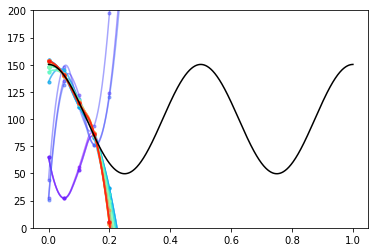

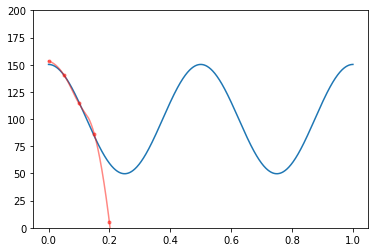

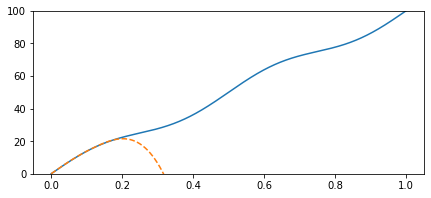

In [3769]:
%matplotlib inline
# %matplotlib notebook
cm = plt.get_cmap("rainbow")
arg_best = np.argmin(metric_all, axis=1)
n_generations = SR_all.shape[0]
k=2
plt.figure()
for i in range(0,n_generations,1):
    SR_best = SR_all[i,arg_best[i]]
    spl_SR = splrep(depth_grid, SR_best, s=0,k=k)
    SR_smooth = splev(depth_data, spl_SR)
    
    plt.plot(depth_data, SR_smooth, depth_grid, SR_best, ".", color=cm(i/n_generations), alpha=0.5)

t_data = depth_to_time(depth_data)
plt.plot(depth_data, np.gradient(t_data, depth_data[1]-depth_data[0]), color="black")
plt.ylim([0,200])
plt.figure()
t_data = depth_to_time(depth_data)
plt.plot(depth_data, np.gradient(t_data, depth_data[1]-depth_data[0]))
SR_best = SR_all[-1,arg_best[-1]]
spl_SR = splrep(depth_grid, SR_best, s=0,k=k)
SR_smooth = splev(depth_data, spl_SR)

plt.plot(depth_data, SR_smooth, depth_grid, SR_best, ".", color=cm(i/n_generations), alpha=0.5)
plt.ylim([0,200])


i=-1
SR_best = SR_all[i,arg_best[i]]
spl_SR = splrep(depth_grid, SR_best, s=0,k=k)
SR_smooth = splev(depth_data, spl_SR)
yx = sp.integrate.cumtrapz(SR_smooth, depth_data, initial=0)
fig, ax =plt.subplots(1,1,figsize=(7,3))
# ax = axs[0]
ax.plot(depth_data, time_data)
ax.plot(depth_data, yx, '--')
ax.set_ylim([0,100])

In [3636]:
# # NHUNG EM AH, EM AH,PHO XA DONG VUi, KHI CON EM CHO
# # KHI CON BAO NOI NHO, THUONG, THUONG, THUONG
# # NHUNG EM AH
# # EM AH
# AH AH ah ah
# GIET MOI CON DAU BANG NIEM VO VONG, BANG VAI TIA HY VONG, HY VONG CUA HAI TA
# NHUNG EM AH, EM AH
# 

In [4039]:
K = 1000 # number of individual in population 
n_generations_max = 40
N_genes = 21 # number of intial gene in an individial of the population 
depth_grid = np.linspace(0,1,N_genes)
SR_lims = [0, 200]
# BICs_all = np.zeros((n_generations_max-1,K))
metric_all = np.zeros((n_generations_max,K))
SR_all = np.zeros((n_generations_max,K,N_genes))
SR_ini = np.random.rand(K,N_genes)*SR_lims[1]
SR_all[0] = SR_ini
# metric_ini = np.array([metric([depth_grid, SR_ini_i] , [depth_data, y_data], [f1, f2], metric_type="BIC", k=3) for SR_ini_i in SR_ini])
# metric_all[0] = metric_ini

In [4042]:
window_width = 0.2
sliding_step = 0.2
depth_range = [0,1.0]
N_step = (max(depth_range) - window_width )/sliding_step + 1
N_step = round(N_step)
for i in range(N_step):
    window_range = sliding_step*i, sliding_step*i+window_width+1e-9
    print(window_range)
    i_i, i_u = np.searchsorted(depth_grid, window_range)
    data_SR_ini = depth_grid[i_i:i_u], SR_ini[:,i_i:i_u]
    i_i_d, i_u_d = np.searchsorted(depth_data, window_range)
    data = [depth_data[i_i_d:i_u_d], y_data[i_i_d:i_u_d]]
    SR_x, depth_gridx, metric_x = RCGA_TimeOpt(data, [f1,f2], n_generations_max, SR_lims, data_SR_ini)
    n_gen = SR_x.shape[0]
    SR_all[:n_gen,:,i_i:i_u] = SR_x; SR_all[-1,:,i_i:i_u]=SR_x[-1]
#     break

(0.0, 0.200000001)
40 generations
(0.2, 0.40000000100000005)
40 generations
(0.4, 0.6000000010000001)
19 generations
(0.6000000000000001, 0.800000001)
40 generations
(0.8, 1.000000001)
40 generations


(0.0, 200.0)

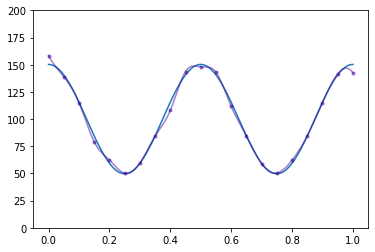

In [4044]:
plt.figure()
t_data = depth_to_time(depth_data)
plt.plot(depth_data, np.gradient(t_data, depth_data[1]-depth_data[0]))
SR_best = SR_all[-1,0]
# SR_best = SR_x[8,0]

spl_SR = splrep(depth_grid, SR_best, s=0,k=3)
SR_smooth = splev(depth_data, spl_SR)

plt.plot(depth_data, SR_smooth, depth_grid, SR_best, ".", color=cm(i/n_generations), alpha=0.5)
plt.ylim([0,200])

In [ ]:
asda s